# Using LAMMPS with iPython and Jupyter

LAMMPS can be run interactively using iPython easily. This tutorial shows how to set this up.

## Installation

1. Download the latest version of LAMMPS into a folder (we will calls this `$LAMMPS_DIR` from now on)
2. Compile LAMMPS as a shared library and enable PNG support
   ```bash
   cd $LAMMPS_DIR/src
   python2 Make.py -m mpi -png -a file
   make mode=shlib auto
   ```

3. Create a python virtualenv
   ```bash
   virtualenv testing
   source testing/bin/activate
   ```

4. Inside the virtualenv install the lammps package
   ```
   (testing) cd $LAMMPS_DIR/python
   (testing) python install.py
   (testing) cd   # move to your working directory
   ```

5. Install jupyter and ipython in the virtualenv
   ```bash
   (testing) pip install ipython jupyter
   ```

6. Run jupyter notebook
   ```bash
   (testing) jupyter notebook
   ```

## Example

In [1]:
from lammps import IPyLammps

In [2]:
L = IPyLammps()

LAMMPS output is captured by PyLammps wrapper


In [3]:
import math

# 3d Lennard-Jones melt

L.units("lj")
L.atom_style("atomic")
L.atom_modify("map array")

L.lattice("fcc", 0.8442)
L.region("box", "block", 0, 4, 0, 4, 0, 4)
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)

L.velocity("all", "create", 1.44, 87287, "loop geom")

L.pair_style("lj/cut", 2.5)
L.pair_coeff(1, 1, 1.0, 1.0, 2.5)

L.neighbor(0.3, "bin")
L.neigh_modify("delay", 0, "every", 20, "check no")

L.fix("1 all nve")

L.variable("fx atom fx")

L.info("all")

L.run(10)

['Neighbor list info ...',
 '  1 neighbor list requests',
 '  update every 20 steps, delay 0 steps, check no',
 '  max neighbors/atom: 2000, page size: 100000',
 '  master list distance cutoff = 2.8',
 '  ghost atom cutoff = 2.8',
 '  binsize = 1.4, bins = 5 5 5',
 'Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 0',
 '  Time step     : 0.005',
 'Memory usage per processor = 2.04486 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '       0         1.44   -6.7733681            0   -4.6218056   -5.0244179 ',
 '      10    1.1298532   -6.3095502            0   -4.6213906   -2.6058175 ',
 'Loop time of 0.001143 on 1 procs for 10 steps with 256 atoms',
 '',
 'Performance: 3779527.555 tau/day, 8748.906 timesteps/s',
 '291.6% CPU use with 1 MPI tasks x no OpenMP threads',
 '',
 'MPI task timing breakdown:',
 'Section |  min time  |  avg time  |  max time  |%varavg| %total',
 '---------------------------------------------------------------',
 'Pair    | 0.001048   |

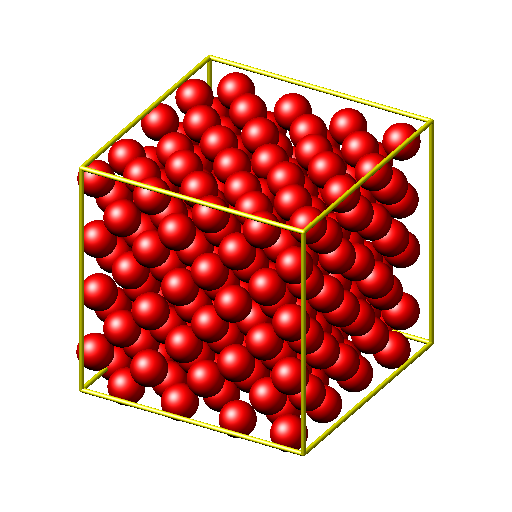

In [4]:
L.image(zoom=1.0)